In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

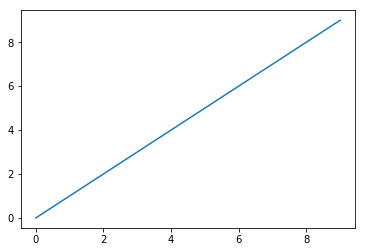

In [3]:
plt.plot(data)

## Figure和Subplot
matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

如果用的是IPython，这时会弹出一个空窗口，但在Jupyter中，必须再输入更多命令才能看到。plt.figure有一些选项，特别是figsize，它用于确保当图片保存到磁盘时具有一定的大小和纵横比。
不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行：

In [5]:
ax1 = fig.add_subplot(2, 2, 1)

这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。如果再把后面两个subplot也创建出来，最终得到的图像如图9-2所示：

In [8]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

使用Jupyter notebook有一点不同，即每个小窗重新执行后，图形会被重置。因此，对于复杂的图形，，你必须将所有的绘图命令存在一个小窗里。

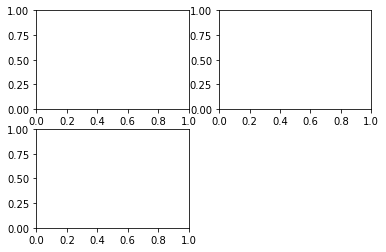

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

如果这时执行一条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6])），matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，隐藏创建figure和subplot的过程。因此，如果我们执行下列命令，你就会得到如图9-3所示的结果：


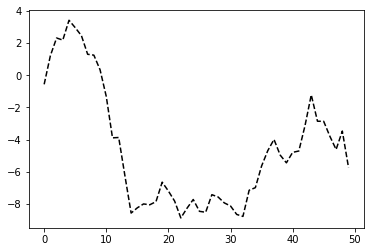

In [10]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了，如图9-4所示：

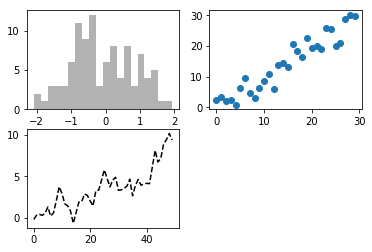

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6072c6bd68>,
      dtype=object)

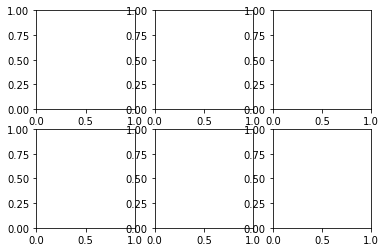

In [24]:
fig, axes = plt.subplots(2, 3)
axes

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。有关该方法的更多信息，请参见表9-1。


![](https://upload-images.jianshu.io/upload_images/7178691-88bb55faca7d01ba.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/554/format/webp)

## 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数：


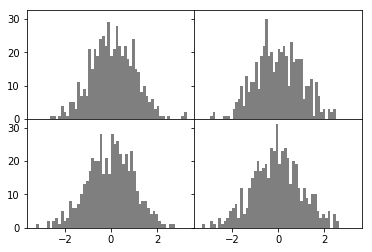

In [26]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

不难看出，其中的轴标签重叠了。matplotlib不会检查标签是否重叠，所以对于这种情况，你只能自己设定刻度位置和刻度标签。后面几节将会详细介绍该内容。
## 颜色、标记和线型
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码：
ax.plot(x, y, 'g--')

这种在一个字符串中指定颜色和线型的方式非常方便。在实际中，如果你是用代码绘图，你可能不想通过处理字符串来获得想要的格式。通过下面这种更为明确的方式也能得到同样的效果：ax.plot(x, y, linestyle='--', color='g')

常用的颜色可以使用颜色缩写，你也可以指定颜色码（例如，'#CECECE'）。你可以通过查看plot的文档字符串查看所有线型的合集（在IPython和Jupyter中使用plot?）。
线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面（见图9-6）：


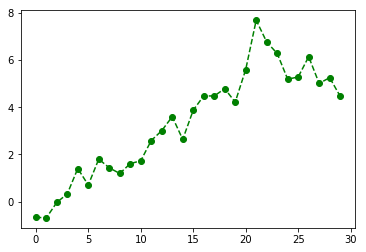

In [29]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'go--')

还可以将其写成更为明确的形式：

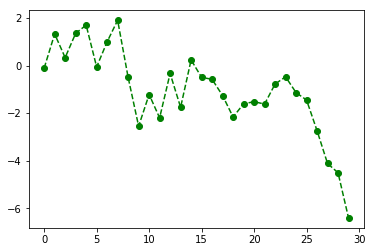

In [32]:
plt.plot(randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改（见图9-7）：

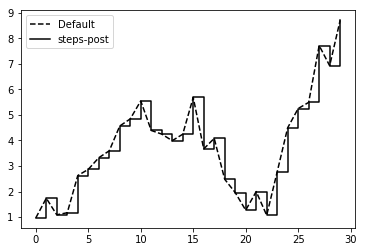

In [34]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

你可能注意到运行上面代码时有输出<matplotlib.lines.Line2D at ...>。matplotlib会返回引用了新添加的子组件的对象。大多数时候，你可以放心地忽略这些输出。这里，因为我们传递了label参数到plot，我们可以创建一个plot图例，指明每条使用plt.legend的线。

笔记：你必须调用plt.legend（或使用ax.legend，如果引用了轴的话）来创建图例，无论你绘图时是否传递label标签选项。


## 刻度、标签和图例
对于大多数的图表装饰项，其主要实现方式有二：使用过程型的pyplot接口（例如，matplotlib.pyplot）以及更为面向对象的原生matplotlib API。
pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。其使用方式有以下两种：

调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。
调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。

所有这些方法都是对当前或最近创建的AxesSubplot起作用的。它们各自对应subplot对象上的两个方法，以xlim为例，就是ax.get_xlim和ax.set_xlim。我更喜欢使用subplot的实例方法（因为我喜欢明确的事情，而且在处理多个subplot时这样也更清楚一些）。当然你完全可以选择自己觉得方便的那个。


## 设置标题、轴标签、刻度以及刻度标签
为了说明自定义轴，我将创建一个简单的图像并绘制一段随机漫步（如图9-8所示）：

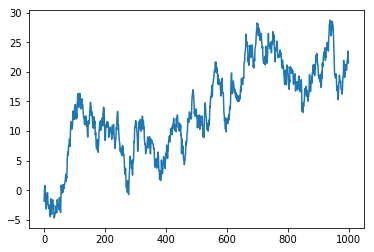

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签：

In [36]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')

rotation选项设定x刻度标签倾斜30度。最后，再用set_xlabel为X轴设置一个名称，并用set_title设置一个标题（见图9-9的结果）：

Text(0.5, 0, 'Stages')

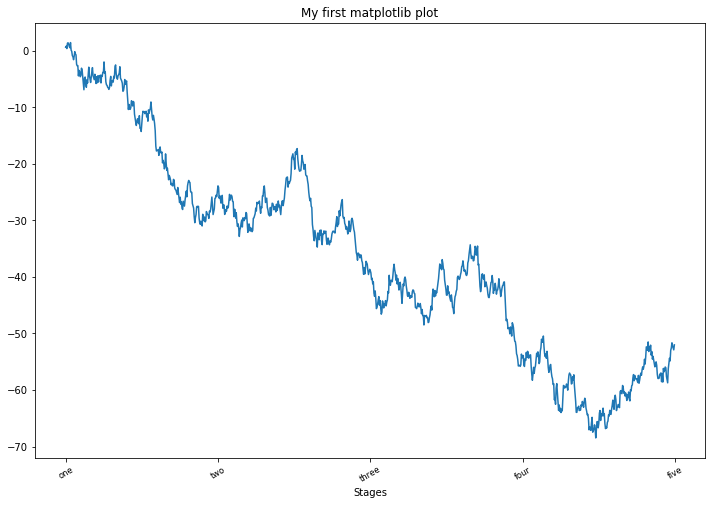

In [43]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_title('My first matplotlib plot')
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')
ax.set_xlabel('Stages')

Y轴的修改方式与此类似，只需将上述代码中的x替换为y即可。轴的类有集合方法，可以批量设定绘图选项。前面的例子，也可以写为：

In [44]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 17.200000000000003, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

## 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数：

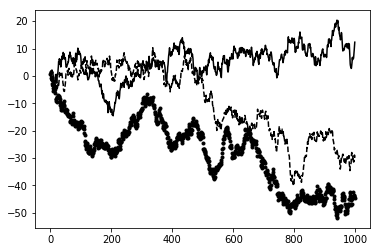

In [45]:
from numpy.random import randn
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

在此之后，你可以调用ax.legend()或plt.legend()来自动创建图例（结果见图9-10）：

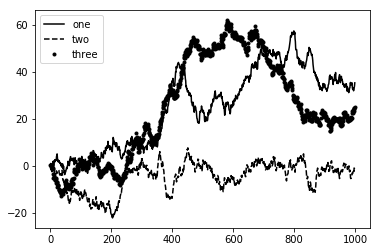

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

legend方法有几个其它的loc位置参数选项。请查看文档字符串（使用ax.legend?）。

loc告诉matplotlib要将图例放在哪。如果你不是吹毛求疵的话，"best"是不错的选择，因为它会选择最不碍事的位置。要从图例中去除一个或多个元素，不传入label或传入label='nolegend'即可。（中文第一版这里把best错写成了beat）


## 注解以及在Subplot上绘图
除标准的绘图类型，你可能还希望绘制一些子集的注解，可能是文本、箭头或其他图形等。注解和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式：
ax.text(x, y, 'Hello world!',family='monospace', fontsize=10)

注解中可以既含有文本也含有箭头。例如，我们根据最近的标准普尔500指数价格（来自Yahoo!Finance）绘制一张曲线图，并标出2008年到2009年金融危机期间的一些重要日期。你可以在Jupyter notebook的一个小窗中试验这段代码（图9-11是结果）：

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

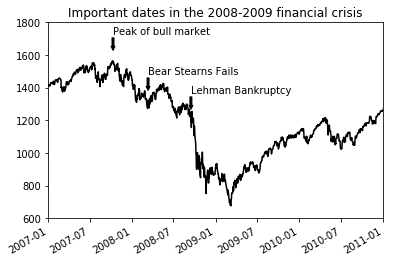

In [51]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

这张图中有几个重要的点要强调：ax.annotate方法可以在指定的x和y坐标轴绘制标签。我们使用set_xlim和set_ylim人工设定起始和结束边界，而不使用matplotlib的默认方法。最后，用ax.set_title添加图标标题。

更多有关注解的示例，请访问matplotlib的在线示例库。

图形的绘制要麻烦一些。matplotlib有一些表示常见图形的对象。这些对象被称为块（patch）。其中有些（如Rectangle和Circle），可以在matplotlib.pyplot中找到，但完整集合位于matplotlib.patches。

要在图表中添加一个图形，你需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中（如图9-12所示）：


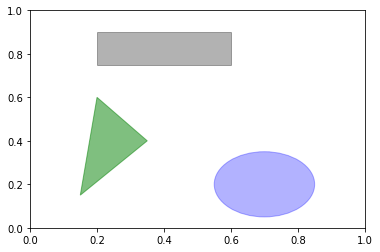

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 将图表保存到文件
利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。例如，要将图表保存为SVG文件，你只需输入：plt.savefig('figpath.svg')

文件类型是通过文件扩展名推断出来的。因此，如果你使用的是.pdf，就会得到一个PDF文件。我在发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。要得到一张带有最小白边且分辨率为400DPI的PNG图片，你可以：

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO：

In [53]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

![](https://upload-images.jianshu.io/upload_images/7178691-4bee796bf7262423.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/554/format/webp)
matplotlib配置
matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，它们可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。一种Python编程方式配置系统的方法是使用rc方法。例如，要将全局的图像默认大小设置为10×10，你可以执行：

plt.rc('figure', figsize=(10, 10))

rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。一个简单的办法是将这些选项写成一个字典：

In [55]:
font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 5}
plt.rc('font', **font_options)

要了解全部的自定义选项，请查阅matplotlib的配置文件matplotlibrc（位于matplotlib/mpl-data目录中）。如果对该文件进行了自定义，并将其放在你自己的.matplotlibrc目录中，则每次使用matplotlib时就会加载该文件。
下一节，我们会看到，seaborn包有若干内置的绘图主题或类型，它们使用了matplotlib的内部配置。
## 使用pandas和seaborn绘图
matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。
在pandas中，我们有多列数据，还有行和列标签。pandas自身就有内置的方法，用于简化从DataFrame和Series绘制图形。另一个库seaborn（https://seaborn.pydata.org/），由Michael Waskom创建的静态图形库。Seaborn简化了许多常见可视类型的创建。

提示：引入seaborn会修改matplotlib默认的颜色方案和绘图类型，以提高可读性和美观度。即使你不使用seaborn API，你可能也会引入seaborn，作为提高美观度和绘制常见matplotlib图形的简化方法。


## 线型图
Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图（如图9-13所示）：

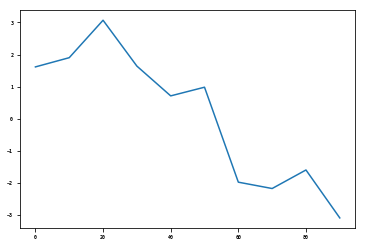

In [59]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

该Series对象的索引会被传给matplotlib，并用以绘制X轴。可以通过use_index=False禁用该功能。X轴的刻度和界限可以通过xticks和xlim选项进行调节，Y轴就用yticks和ylim。plot参数的完整列表请参见表9-3。我只会讲解其中几个，剩下的就留给读者自己去研究了。


![](https://upload-images.jianshu.io/upload_images/7178691-6d9fbf863c09370a.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/554/format/webp)
![](https://upload-images.jianshu.io/upload_images/7178691-44e50562aeb5eb49.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/554/format/webp)

pandas的大部分绘图方法都有一个可选的ax参数，它可以是一个matplotlib的subplot对象。这使你能够在网格布局中更为灵活地处理subplot的位置。

DataFrame的plot方法会在一个subplot中为各列绘制一条线，并自动创建图例（如图9-14所示）：

In [60]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),columns=['A', 'B', 'C', 'D'],index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-0.482034,-0.797849,0.008118,0.568818
10,0.380469,-0.045537,-0.263411,2.004260
20,0.288556,0.520227,-1.142659,2.527862
30,0.419155,-0.672892,0.870252,2.943141
40,-0.629918,-0.798714,-0.362840,3.137878
50,-1.131046,1.244048,0.226574,3.084408
60,-2.811376,3.089940,1.147379,1.835787
70,-2.103895,4.324427,1.137260,0.408667
80,-1.505136,4.004680,0.654445,2.225636
90,-0.004704,3.735678,0.436852,2.474165


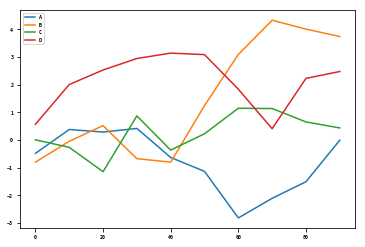

In [61]:
df.plot()

plot属性包含一批不同绘图类型的方法。例如，df.plot()等价于df.plot.line()。后面会学习这些方法。

笔记：plot的其他关键字参数会被传给相应的matplotlib绘图函数，所以要更深入地自定义图表，就必须学习更多有关matplotlib API的知识。

DataFrame还有一些用于对列进行灵活处理的选项，例如，是要将所有列都绘制到一个subplot中还是创建各自的subplot。详细信息请参见表9-4。
![](https://upload-images.jianshu.io/upload_images/7178691-96651ecaa90f1c68.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/554/format/webp)

## 柱状图
plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度（如图9-15所示）：

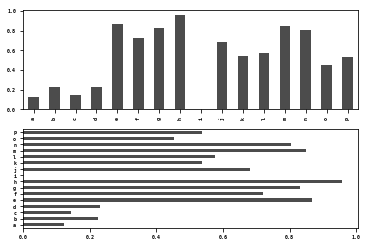

In [64]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

color='k'和alpha=0.7设定了图形的颜色为黑色，并使用部分的填充透明度。对于DataFrame，柱状图会将每一行的值分为一组，并排显示，如图9-16所示：

In [65]:
df = pd.DataFrame(np.random.rand(6, 4),index=['one', 'two', 'three', 'four', 'five', 'six'],columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.564362,0.229588,0.766100,0.291769
two,0.807392,0.325466,0.198852,0.123442
three,0.433533,0.551171,0.066612,0.765213
four,0.767509,0.873346,0.451859,0.203954
five,0.659688,0.119226,0.051352,0.519935
six,0.934554,0.668311,0.315189,0.697783


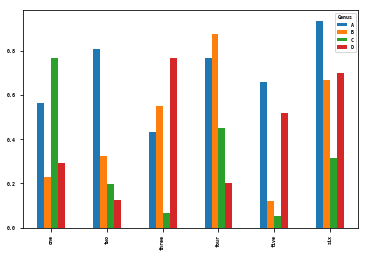

In [66]:
df.plot.bar()

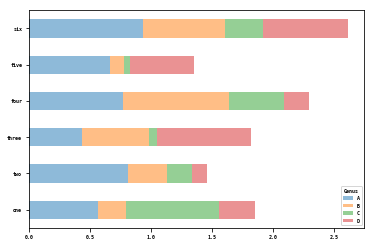

In [67]:
df.plot.barh(stacked=True, alpha=0.5)

柱状图有一个非常不错的用法：利用value_counts图形化显示Series中各值的出现频率，比如s.value_counts().plot.bar()。

In [68]:
tips = pd.read_csv('data/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts


size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [69]:
party_counts = party_counts.loc[:, 2:5]

然后进行规格化，使得各行的和为1，并生成图表（如图9-18所示）：

In [70]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


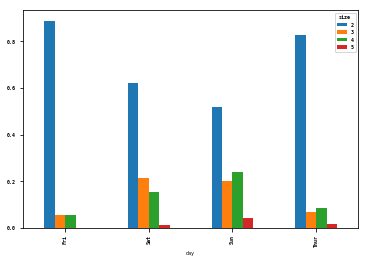

In [71]:
party_pcts.plot.bar()

于是，通过该数据集就可以看出，聚会规模在周末会变大。

对于在绘制一个图形之前，需要进行合计的数据，使用seaborn可以减少工作量。用seaborn来看每天的小费比例（图9-19是结果）：

In [72]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


/mnt/sdb/lh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


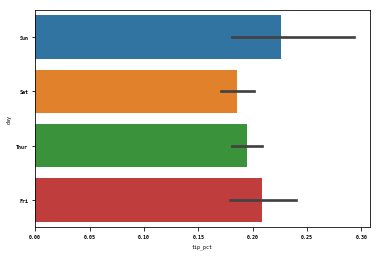

In [73]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

seaborn的绘制函数使用data参数，它可能是pandas的DataFrame。其它的参数是关于列的名字。因为一天的每个值有多次观察，柱状图的值是tip_pct的平均值。绘制在柱状图上的黑线代表95%置信区间（可以通过可选参数配置）。
seaborn.barplot有颜色选项，使我们能够通过一个额外的值设置（见图9-20）：


注意，seaborn已经自动修改了图形的美观度：默认调色板，图形背景和网格线的颜色。你可以用seaborn.set在不同的图形外观之间切换：

sns.set(style="whitegrid")

## 直方图和密度图
直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。再以前面那个小费数据为例，通过在Series使用plot.hist方法，我们可以生成一张“小费占消费总额百分比”的直方图（如图9-21所示）：


与此相关的一种图表类型是密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。使用plot.kde和标准混合正态分布估计即可生成一张密度图（见图9-22）：



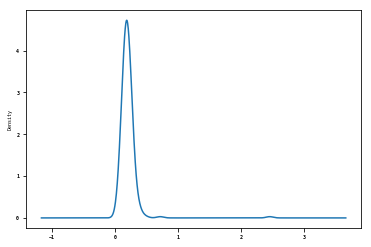

In [75]:
tips['tip_pct'].plot.density()

seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。作为例子，考虑一个双峰分布，由两个不同的标准正态分布组成（见图9-23）：

/mnt/sdb/lh/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


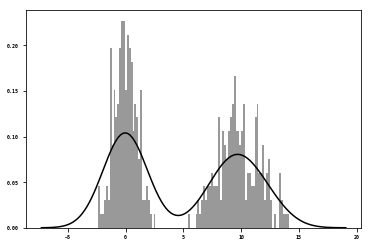

In [76]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## 散布图或点图
点图或散布图是观察两个一维数据序列之间的关系的有效手段。在下面这个例子中，我加载了来自statsmodels项目的macrodata数据集，选择了几个变量，然后计算对数差：

In [78]:
macro = pd.read_csv('data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


/mnt/sdb/lh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


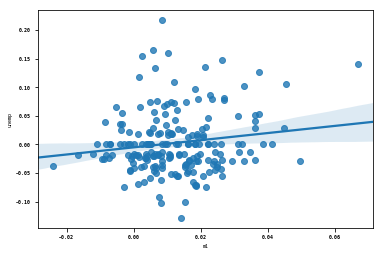

In [79]:
sns.regplot('m1', 'unemp', data=trans_data)

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。纯手工创建这样的图表很费工夫，所以seaborn提供了一个便捷的pairplot函数，它支持在对角线上放置每个变量的直方图或密度估计（见图9-25）：

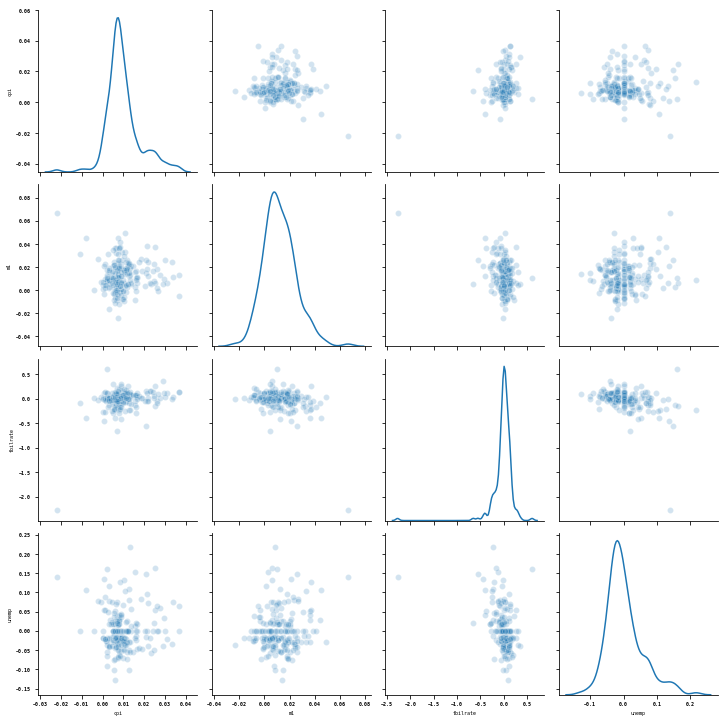

In [80]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## 分面网格（facet grid）和类型数据
要是数据集有额外的分组维度呢？有多个分类变量的数据可视化的一种方法是使用小面网格。seaborn有一个有用的内置函数factorplot，可以简化制作多种分面图（见图9-26）：

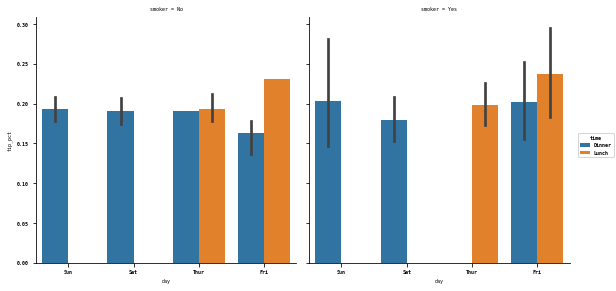

In [81]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',kind='bar', data=tips[tips.tip_pct < 1])

除了在分面中用不同的颜色按时间分组，我们还可以通过给每个时间值添加一行来扩展分面网格：

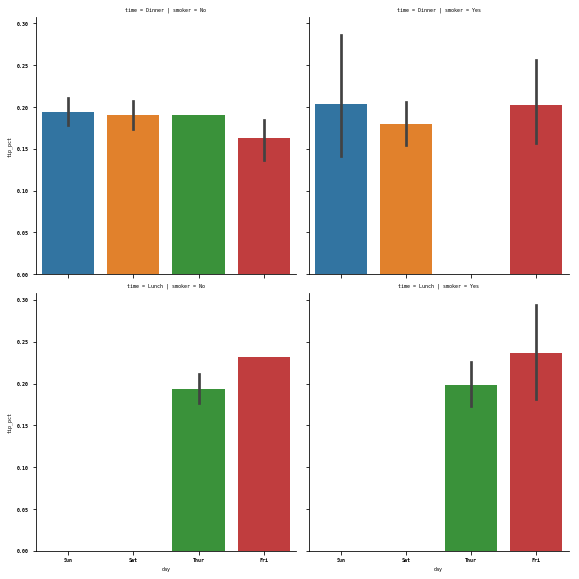

In [82]:
sns.factorplot(x='day', y='tip_pct', row='time',col='smoker',kind='bar', data=tips[tips.tip_pct < 1])

factorplot支持其它的绘图类型，你可能会用到。例如，盒图（它可以显示中位数，四分位数，和异常值）就是一个有用的可视化类型（见图9-28）：

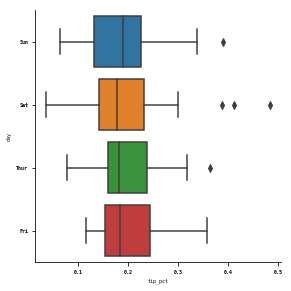

In [83]:
sns.factorplot(x='tip_pct', y='day', kind='box',data=tips[tips.tip_pct < 0.5])